In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import warnings
warnings.simplefilter('ignore')
import mplfinance as mpf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import ta
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.regularizers import l2
from keras.layers import LSTM,Dense,Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from keras.models import Sequential
import sklearn.metrics, math
seed=123

In [2]:
#downloading the stock data
start = '2010-12-15'
end = '2020-12-15'
ticker = 'K'
interval = "1d"
df =yf.download(ticker,start,end,interval)


[*********************100%***********************]  1 of 1 completed


In [3]:
#generating return columns
df['r'] =df['Adj Close'].pct_change()*100
df.drop(['Dividends','Stock Splits'],axis=1,inplace=True)
df.dropna(inplace=True)

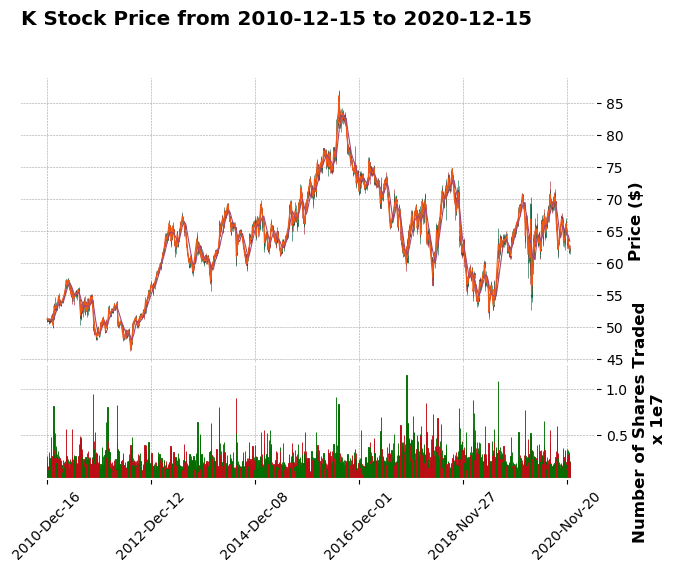

In [4]:
# Visualizing the stock price and volume

mpf.plot(df, type='candle', style='charles',
            title=ticker+' Stock Price from '+start+' to '+end ,
            ylabel='Price ($)',
            ylabel_lower='Number of Shares Traded',
            volume=True, 
            mav=(3,6,20), 
           )
plt.show()

In [5]:
# data summary
df

,Open,High,Low,Close,Adj Close,Volume,r
Date,,,,,,,
2010-12-16,51.220001,51.270000,50.970001,51.139999,37.217472,1881300,0.156697
2010-12-17,51.000000,51.380001,50.990002,51.230000,37.282970,2611900,0.175988
2010-12-20,51.169998,51.450001,51.119999,51.360001,37.377571,1786400,0.253737
2010-12-21,51.500000,51.619999,51.080002,51.110001,37.195633,1923200,-0.486758
2010-12-22,50.930000,51.380001,50.910000,51.299999,37.333908,1445200,0.371751
...,...,...,...,...,...,...,...
2020-12-08,62.110001,62.610001,61.750000,62.549999,62.549999,2874700,0.968521
2020-12-09,62.669998,62.840000,61.560001,62.000000,62.000000,3059200,-0.879295
2020-12-10,62.130001,62.310001,61.689999,61.980000,61.980000,2112300,-0.032259


In [6]:
# data information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-12-16 to 2020-12-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
 6   r          2516 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB


In [7]:
# data descriptive summary
df.describe()

,Open,High,Low,Close,Adj Close,Volume,r
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000
mean,63.394233,63.877603,62.920580,63.413040,54.207440,2.131137e+06,0.027872
std,7.701927,7.769950,7.638973,7.705188,9.477866,1.104849e+06,1.229407
min,46.549999,46.840000,46.330002,46.509998,35.525986,3.748000e+05,-10.919369
25%,57.369999,57.884999,56.917499,57.400002,48.400600,1.432850e+06,-0.520404
50%,63.895000,64.410004,63.400002,63.840000,54.605705,1.850350e+06,0.059213
75%,68.355000,69.040001,67.812498,68.532499,62.437747,2.496600e+06,0.585606
max,86.900002,87.160004,85.400002,86.980003,74.812561,1.159840e+07,10.645785


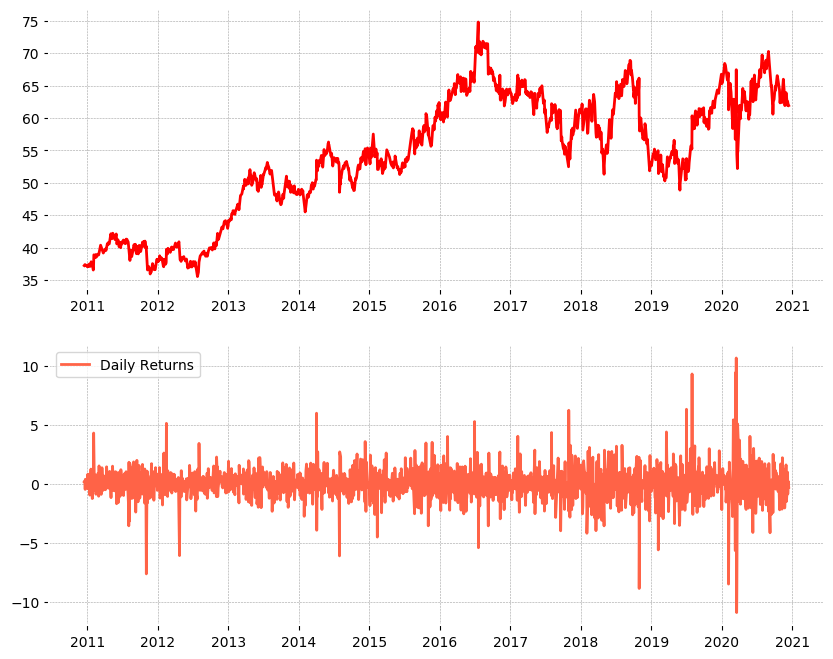

In [8]:
# Plotting Stock Price and Return
fig = plt.figure(figsize=(10, 8))
ax1=plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'].values,color = 'red', label = 'Daily Prices')
ax2=plt.subplot(2, 1, 2)
ax2.plot(df.index, df['r'].values,color = 'tomato', label = 'Daily Returns')
plt.legend(loc = 'best')
plt.show()

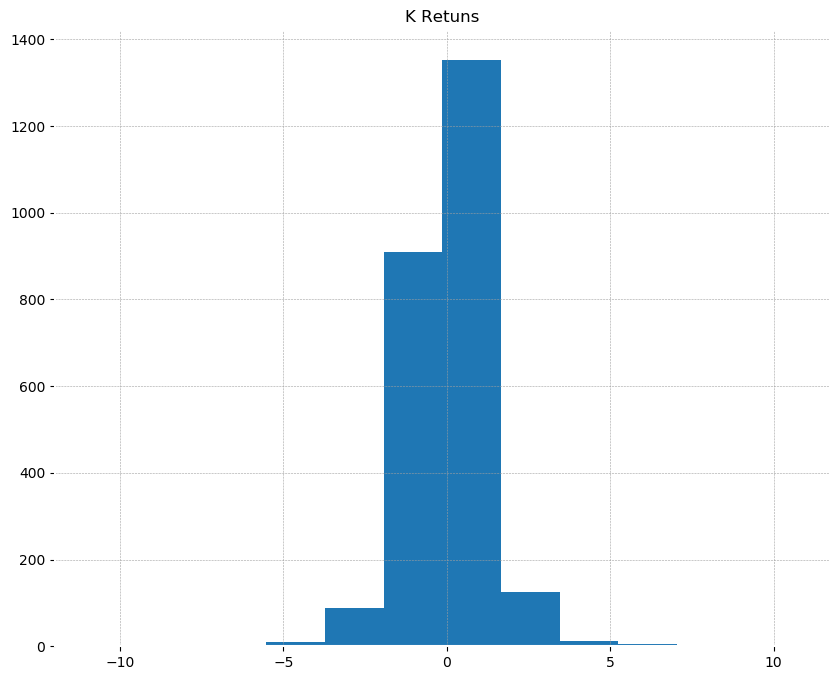

In [9]:
# the stock retun distribution
bins = int(round(1 + (3.322*np.log10(len(df)))))

fig= plt.figure(figsize=(10,8))
plt.hist(df['r'].values,bins=bins)
plt.xlabel = 'Returns'
plt.ylabel = 'Frequency'
plt.title(ticker+' Retuns')
plt.show()

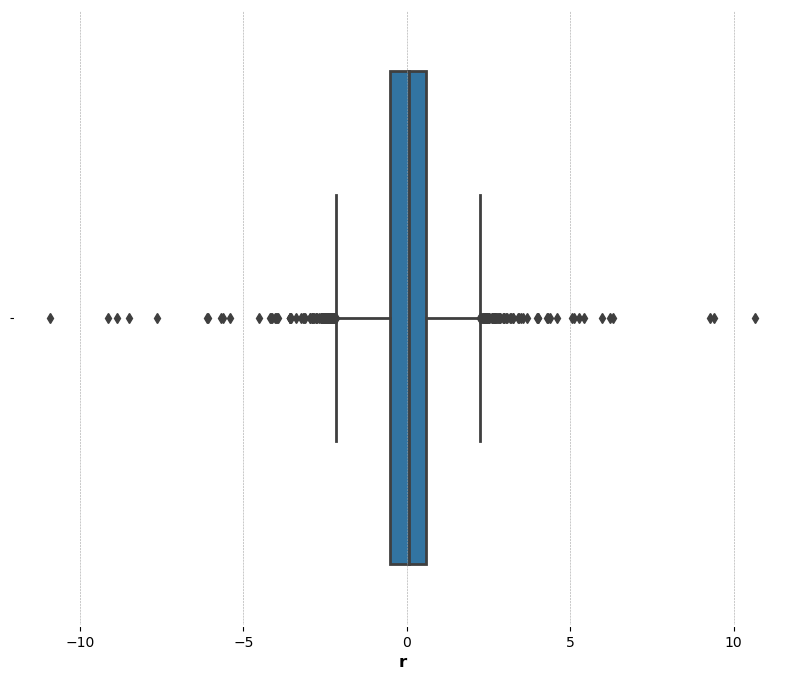

In [10]:
# Visualizing descriptive stock return statistics
fig= plt.figure(figsize=(10,8))
sns.boxplot(x=df['r'])
plt.show()

In [11]:
# Calculating std of returns
std_daily_return = df['r'].std()
print(ticker+' Daily Volatility: ', '{:.2f}%'.format(std_daily_return))
print(ticker+' Monthly Volatility: ', '{:.2f}%'.format(np.sqrt(21)*std_daily_return))
print(ticker+' Annual Volatility: ', '{:.2f}%'.format(np.sqrt(252)*std_daily_return))

K Daily Volatility:  1.23%
K Monthly Volatility:  5.63%
K Annual Volatility:  19.52%


In [12]:
# variables from technical analysis 
df['ema_21'] = ta.trend.EMAIndicator(close=df['Adj Close'], n=21, fillna=False).ema_indicator()
df['ema_200'] =ta.trend.EMAIndicator(close=df['Adj Close'], n=200, fillna=False).ema_indicator()
df['VWAP_5'] = ta.volume.VolumeWeightedAveragePrice(high=df['High'], low=df['Low'], close=df['Adj Close'], volume=df['Volume'], n = 5, fillna= False).volume_weighted_average_price()
df['VWAP_20'] = ta.volume.VolumeWeightedAveragePrice(high=df['High'], low=df['Low'], close=df['Adj Close'], volume=df['Volume'], n = 20, fillna= False).volume_weighted_average_price()
df['stoch_oscill_14'] = ta.momentum.StochasticOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'], n=14, d_n=3, fillna=False).stoch()
df['tsi'] = ta.momentum.TSIIndicator(close=df['Adj Close'],r=20,s=5,fillna=False).tsi()
df['willr_14'] = ta.momentum.WilliamsRIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],lbp= 14).wr()
df['aws_osl'] = ta.momentum.ao(high=df['High'],low=df['Low'],s=5,len=20, fillna=False)
df['ult_osl'] = ta.momentum.uo(high=df['High'],low=df['Low'],close=df['Adj Close'],s=7, m=14, len=28, ws=4.0, wm=2.0, wl=1.0, fillna=False)
df['acc'] = ta.volume.AccDistIndexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'], fillna= False).acc_dist_index()
df['cmf_20'] = ta.volume.ChaikinMoneyFlowIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'], n= 20, fillna= False).chaikin_money_flow() 
df['mfi_5'] = ta.volume.MFIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'], n= 5, fillna= False).money_flow_index()  
df['mfi_14'] = ta.volume.MFIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'], n= 14, fillna= False).money_flow_index()  
df['obv'] = ta.volume.OnBalanceVolumeIndicator(close=df['Adj Close'],volume=df['Volume'],fillna= False).on_balance_volume()
df['vpt'] = ta.volume.VolumePriceTrendIndicator(close=df['Adj Close'],volume=df['Volume'], fillna= False).volume_price_trend()
df['vol_weig_av_p_14'] = ta.volume.VolumeWeightedAveragePrice(high=df['High'],low=df['Low'],close=df['Adj Close'], volume=df['Volume'], n= 14, fillna= False).volume_weighted_average_price()
df['vol_for_in'] = ta.volume.ForceIndexIndicator(close=df['Adj Close'], volume=df['Volume'], n=5, fillna=False).force_index() 
df['neg_vol_ind'] = ta.volume.NegativeVolumeIndexIndicator(close=df['Adj Close'], volume=df['Volume'],fillna=False).negative_volume_index()
df['vpt'] = ta.volume.VolumePriceTrendIndicator(close=df['Adj Close'],volume=df['Volume'], fillna= False).volume_price_trend()
df['atr_10'] = ta.volatility.AverageTrueRange(high=df['High'],low=df['Low'],close=df['Adj Close'], n= 10, fillna= False).average_true_range()
df['adx_14'] = ta.trend.ADXIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'], n=14, fillna= False).adx()
df ['aroon_20'] = ta.trend.AroonIndicator(close=df['Adj Close'], n= 20, fillna = False).aroon_indicator()
df ['cci_10'] =ta.trend.CCIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'], n= 10, c= 0.015, fillna= False).cci()
df ['cci_5'] =ta.trend.CCIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'], n= 5, c= 0.015, fillna= False).cci()
df['macd_20_10'] = ta.trend.MACD(close=df['Adj Close'],n_slow= 20, n_fast= 10, n_sign=7, fillna= False).macd()
df['mass'] = ta.trend.MassIndex(high=df['High'],low=df['Low'], n= 5, n2= 15, fillna= False).mass_index() 
df['psar'] = ta.trend.PSARIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'], step= 0.02, max_step= 0.2, fillna= False).psar()
df['trix_10'] = ta.trend.TRIXIndicator(close=df['Adj Close'], n= 10, fillna= False).trix()
df['vortex_10'] =ta.trend.VortexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],n=10, fillna= False).vortex_indicator_diff()
df['acc'] =ta.volume.acc_dist_index(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'], fillna= False)
df['vol_for_in'] =ta.volume.force_index(close=df['Adj Close'], volume=df['Volume'], n=5, fillna=False)
df['obv'] = ta.volume.on_balance_volume(close=df['Adj Close'],volume=df['Volume'],fillna= False)


In [13]:
# dropping nan values
df.dropna(inplace=True)

In [14]:
# Coppying dataframe to use date index for final visualization
df0= df.copy()

In [15]:
# resetting index, dropping nan values

df.reset_index(inplace=True)

In [16]:
# Generating mid_point_level price (target) to make more accurate prediction
df_n = pd.DataFrame((df['High']+df['Low'])/2)
df_n['high_low_dif_per'] = (df['High']-df['Low'])/df['Adj Close']
df_n.columns = ['mid_point_price','high_low_dif_per']

In [17]:
# Finalizing dataframe
df =  pd.concat([df_n,df],axis=1)

In [18]:
# Dropping irrelavent and same class variables
df.drop(['Low','High','Open','Date','Close', 'Adj Close', 'r'],axis=1,inplace=True)

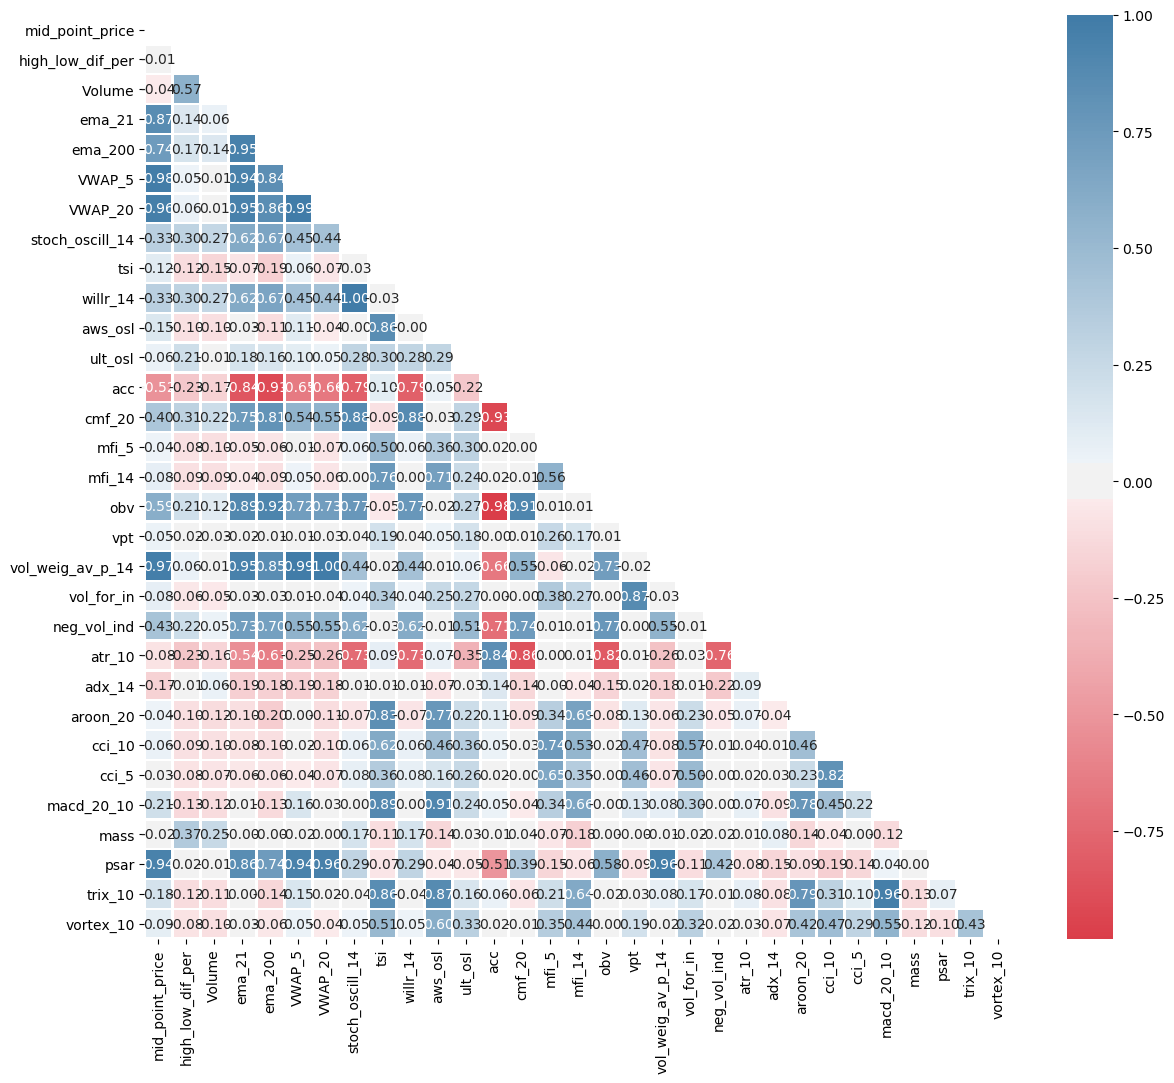

In [19]:
# Correlation Matrix and visualazing it on heat map
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
figure = plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), mask=mask,center=0, cmap=cmap, linewidths=1,annot=True, fmt=".2f")
plt.show()

In [20]:
#Scaling the values 
train = df
scalers={}
for i in train.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s

In [21]:
# Principal component analysis implementation
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df)
df_reduced = pd.DataFrame(df_reduced)


In [22]:
# Train_test split for features
train_test_split_rate = 0.95
train_test_split_point = int(len(df_reduced)*train_test_split_rate)
df_train_reduced,df_test_reduced = df_reduced.iloc[:train_test_split_point,:],df_reduced.iloc[train_test_split_point:,:]


In [23]:
# Train_test split for target
train_test_split_rate = 0.95
train_test_split_point = int(len(df)*train_test_split_rate)
df_train,df_test = df.iloc[:train_test_split_point,:],df.iloc[train_test_split_point:,:]

In [24]:
# Prediction parameters
n_past = 60
n_future = 1 
n_features = df_train_reduced.shape[1]

In [25]:
#Adjusting train / test data for feature
missing_features_data_reduced = df_train_reduced.tail(n_past)
df_test_reduced = missing_features_data_reduced.append(df_test_reduced)


In [26]:
#Adjusting train / test data for target
missing_features_data = df_train.tail(n_past)
df_test = missing_features_data.append(df_test)

In [27]:
#Converting the series to samples
def split_series(a,b,target_index, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  
  
  X, y = list(), list()
  for i in range(len(a)):
    past_end = i + n_past
    future_end = past_end + n_future
    if future_end > len(a)-1:
      break
    # slicing the past and future parts of the window
    past, future = b.iloc[i:past_end, :].values,a.iloc[future_end,target_index]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [28]:
# Train data
X_train, y_train = split_series(df_train,df_train_reduced,0,n_past,n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))

In [29]:
# Test data
X_test, y_test = split_series(df_test,df_test_reduced,0,n_past,n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))

In [30]:
# cheking data shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2140, 60, 10)
(2140,)
(115, 60, 10)
(115,)


In [31]:
#Some model parameters
learning_rate = 0.01
layer1_units = 256
layer2_units = 128
layer3_units = 64
dropout_rate=0.15

# Describing optimization function
opt = Adam(lr =learning_rate)

# Initialize the model
model = Sequential()

# Add LTSM input layer
model.add(LSTM(layer1_units, return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
# Add dropout layer
model.add(Dropout(rate=dropout_rate))
# Add Batchnormalization layer
model.add(BatchNormalization())


# Add first hidden layer
model.add(LSTM(layer2_units, return_sequences=True))
# Add dropout layer
model.add(Dropout(rate=dropout_rate))
# Add Batchnormalization layer
model.add(BatchNormalization())


# Add second hidden layer
model.add(LSTM(layer3_units))
# Add Batchnormalization layer
model.add(BatchNormalization())
# Add dropout layer
model.add(Dropout(rate=dropout_rate))

# Add output layer
model.add(Dense(units = 1))

In [32]:
# Visualizing model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 256)           273408    
_________________________________________________________________
dropout (Dropout)            (None, 60, 256)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 256)           1024      
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 128)           197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 128)           512       
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                4

In [33]:
# Compile the model
model.compile(optimizer = opt, loss = 'mse', metrics =['mean_absolute_error'])

In [34]:
# Fitting the model
hist = model.fit(X_train,y_train,epochs=60,validation_data=(X_test,y_test),batch_size=32,verbose=0)

In [35]:
# Fitted Price
fitted_price = model.predict(X_train)
fitted_price = scalers['scaler_mid_point_price'].inverse_transform(fitted_price)
fitted_price = pd.DataFrame(fitted_price,columns=['Fitted Price'])

In [36]:
# actual prices for train
ytrain = pd.DataFrame(y_train,columns=['Actual Price'])
ytrain = scalers['scaler_mid_point_price'].inverse_transform(ytrain)
ytrain = pd.DataFrame(ytrain,columns=['Actual Price'])

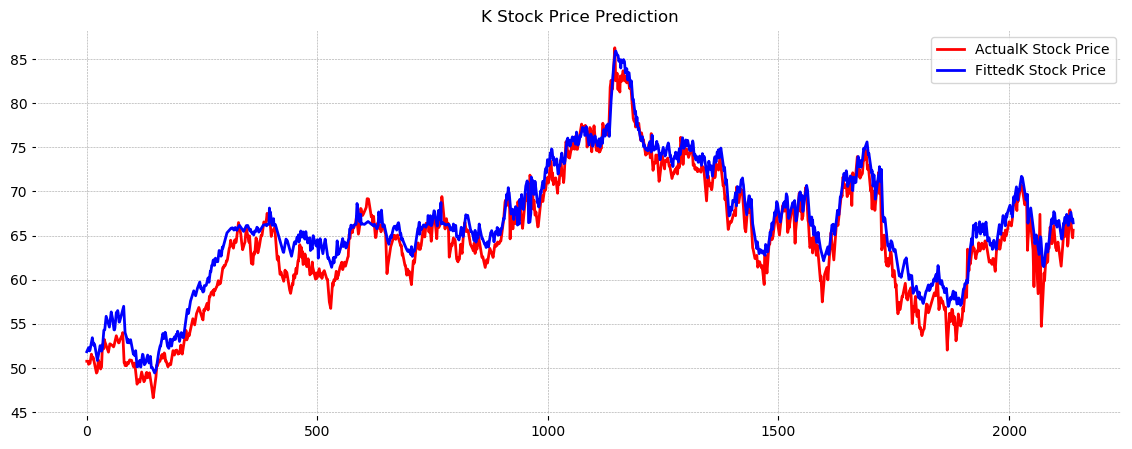

In [37]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(ytrain, color = 'red', label = 'Actual'+ticker+' Stock Price')
plt.plot(fitted_price, color = 'blue', label = 'Fitted'+ticker+' Stock Price')
plt.title(ticker+' Stock Price Prediction')
plt.legend()
plt.show()

In [38]:
# Predicted price
predicted_price = model.predict(X_test)
predicted_price = scalers['scaler_mid_point_price'].inverse_transform(predicted_price)
predicted_price = pd.DataFrame(predicted_price,columns=['Predicted Price'])

In [39]:
# Actual prices for test
ytest = pd.DataFrame(y_test,columns=['Actual Price'])
ytest = scalers['scaler_mid_point_price'].inverse_transform(ytest)
ytest = pd.DataFrame(ytest,columns=['Actual Price'])

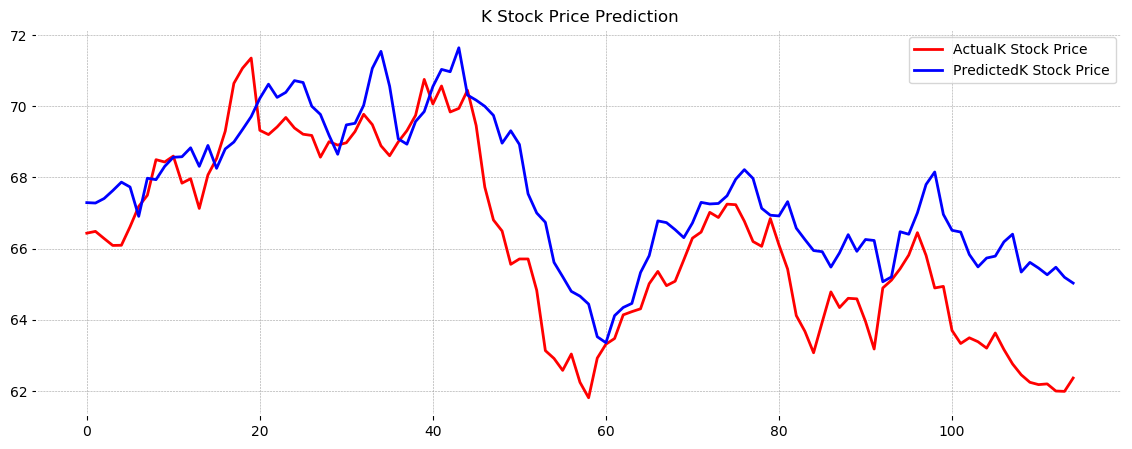

In [40]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(ytest, color = 'red', label = 'Actual'+ticker+' Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted'+ ticker+' Stock Price')
plt.title(ticker +' Stock Price Prediction')
plt.legend()
plt.show()

In [41]:
# Full pr
actual_prices = ytrain.append(ytest)
aa = len(actual_prices)
df0.dropna(inplace=True)
actual_prices.set_index(df0.index[(n_past+n_future):(aa+(n_past+n_future))],inplace=True)
fitted_price.set_index(df0.index[(n_past+n_future):((len(fitted_price)+(n_past+n_future)))],inplace=True)
predicted_price.set_index(df0.index[((len(fitted_price)+(n_past+n_future))):(((len(fitted_price)+(n_past+n_future)))+len(predicted_price))],inplace=True)


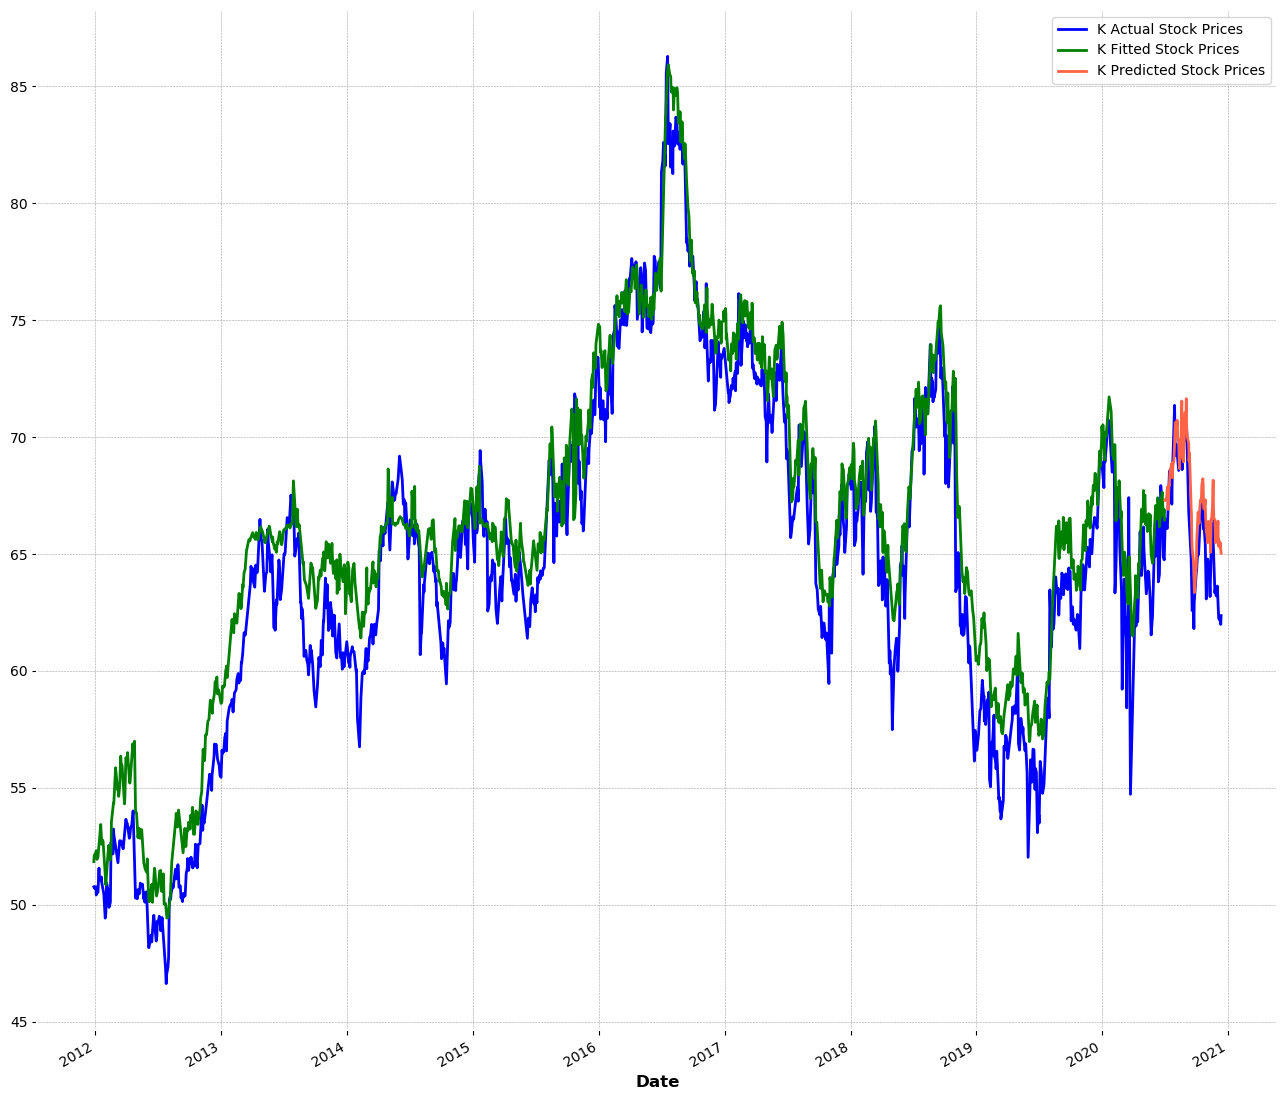

In [42]:
# Full price data visualizing
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
actual_prices['Actual Price'].plot(color='blue',label=ticker+' Actual Stock Prices',ax=ax)
fitted_price['Fitted Price'].plot(color='green',label=ticker+' Fitted Stock Prices',ax=ax)
predicted_price['Predicted Price'].plot(color='tomato',label=ticker+' Predicted Stock Prices',ax=ax)
plt.legend()
plt.show()

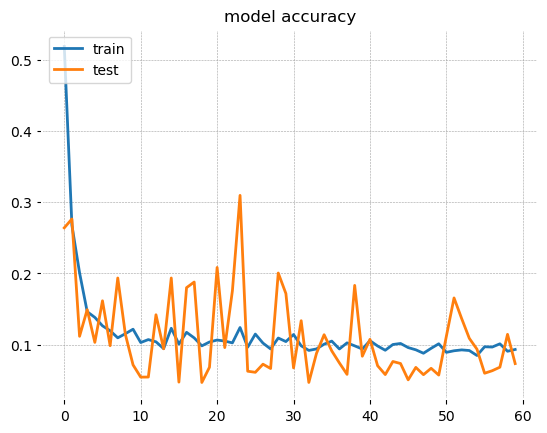

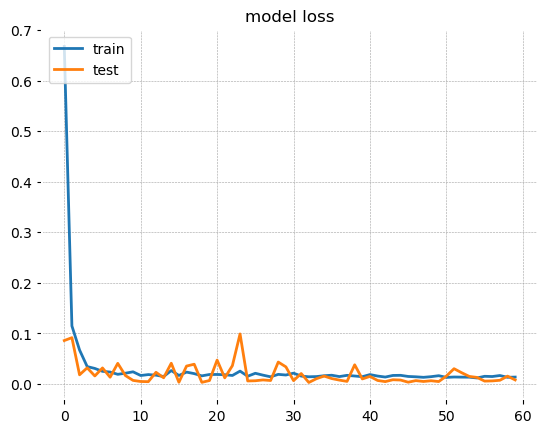

In [43]:
# summarize history for accuracy
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
# Train data evaulatuin 
print("\n")
print("Train Data Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(ytrain,fitted_price))
print("Train Data Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(ytrain,fitted_price))
print("Train Data Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(ytrain,fitted_price)))
print("Train Data R square (R^2):                 %f" % sklearn.metrics.r2_score(ytrain,fitted_price))



Train Data Mean absolute error (MAE):      1.780847
Train Data Mean squared error (MSE):       4.436042
Train Data Root mean squared error (RMSE): 2.106191
Train Data R square (R^2):                 0.919031


In [45]:
# Test data evaulatuin 
print("\n")
print("Test Data Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(ytest,predicted_price))
print("Test Data Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(ytest,predicted_price))
print("Test Data Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(ytest,predicted_price)))
print("Test Data R square (R^2):                 %f" % sklearn.metrics.r2_score(ytest,predicted_price))



Test Data Mean absolute error (MAE):      1.458124
Test Data Mean squared error (MSE):       3.202239
Test Data Root mean squared error (RMSE): 1.789480
Test Data R square (R^2):                 0.519600
